In [23]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Poisson Distribution

Is $\lambda$ a sufficient statistic? 

In [24]:
rvs_1 = poisson.rvs(mu=2, size=1000)
rvs_mean_1 = np.mean(rvs_1)
pmf_1 = poisson.pmf(k=rvs_1, mu=rvs_mean_1)

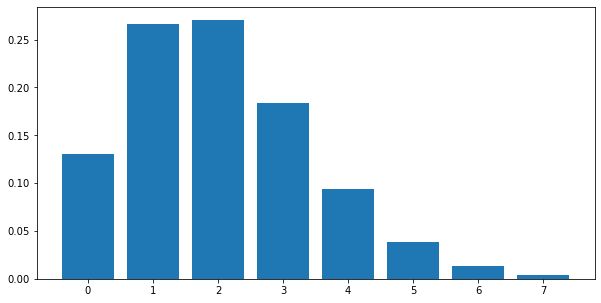

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(rvs_1, pmf_1)
plt.show()

In [26]:
rvs_2 = poisson.rvs(mu=5, size=1000)
rvs_mean_2 = np.mean(rvs_2)
pmf_2 = poisson.pmf(k=rvs_2, mu=rvs_mean_2)

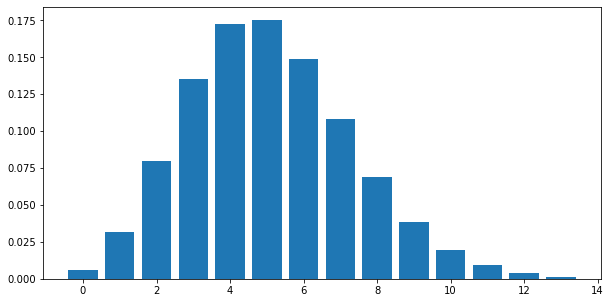

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(rvs_2, pmf_2)
plt.show()

### Joint Distribution

The ordered pair $(X, Y)$ takes values in the product $\{(x_1, y_1), (x_2, y_2), . . .,(x_n, y_n)\}$. The joint probability mass function (joint PMF) of $X$ and $Y$ is the function $p(x_i, y_i)$ giving the probability of the outcome $X = x_i, \quad Y = y_i$ 

The countour plot below should be taken with a grain of salt since the PMF is technically discrete, whereas countour plots visualize continuous functions

In [28]:
rvs_1, rvs_2 = rvs_1.reshape(1, -1), rvs_2.reshape(-1, 1)

z = poisson.pmf(k=rvs_1, mu=rvs_mean_1) * poisson.pmf(k=rvs_2, mu=rvs_mean_2)

rvs_1, rvs_2 = rvs_1.flatten(), rvs_2.flatten()

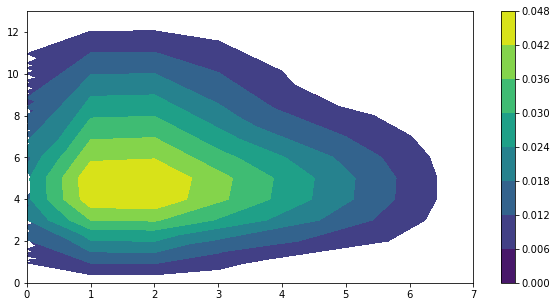

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
joint_pmf = ax.contourf(rvs_1, rvs_2, z)
plt.colorbar(mappable=joint_pmf, ax=ax)
plt.show()

### or

In [30]:
hist, xedges, yedges = np.histogram2d(rvs_1, rvs_2, bins=(10, 10))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

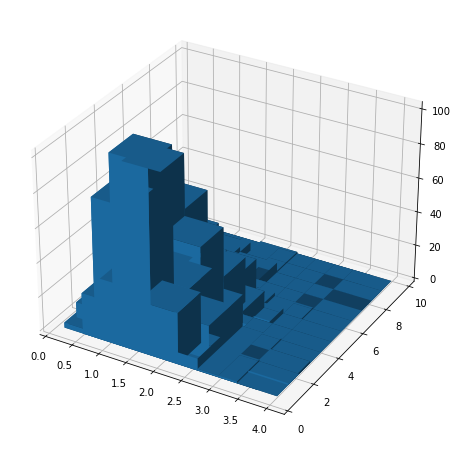

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like(xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [(k-min_height/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [49]:
import plotly.graph_objects as go

In [67]:
np.shape(rvs_1)

(1000,)

In [64]:
data = np.stack([rvs_1, rvs_2], axis=1)

joint_probs, edges = np.histogramdd(data, bins=25)
x_edge, y_edge = edges[0], edges[1]   
xpos, ypos = np.meshgrid(x_edge[:-1] + x_edge[1:], y_edge[:-1] + y_edge[1:])

joint_probs /= joint_probs.sum()

In [65]:
fig = go.Figure(data=[go.Surface(z=joint_probs, x=xpos, y=ypos)])
fig.show()